<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/readEclipseFormat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of how to create a fluid in NeqSim

results of TPflash for fluid 1
                           total          gas                       
           nitrogen   9.68992E-3   9.68992E-3        [mole fraction]
                CO2   1.93798E-2   1.93798E-2        [mole fraction]
            methane   7.94574E-1   7.94574E-1        [mole fraction]
             ethane   1.06589E-1   1.06589E-1        [mole fraction]
            propane   4.84496E-2   4.84496E-2        [mole fraction]
           i-butane   9.68992E-3   9.68992E-3        [mole fraction]
           n-butane   1.16279E-2   1.16279E-2        [mole fraction]
                                                                    
            Density                 8.58047E0               [kg/m^3]
      PhaseFraction                       1E0        [mole fraction]
          MolarMass    2.04524E1    2.04524E1              [kg/kmol]
           Z factor                9.70853E-1                    [-]
 Heat Capacity (Cp)                 2.05575E0              [kJ/kg*K]
 He

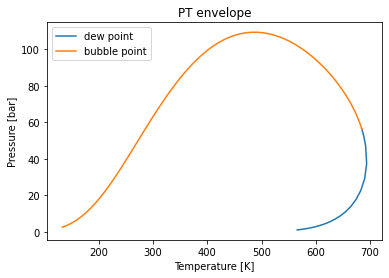

phase envelope for fluid 2


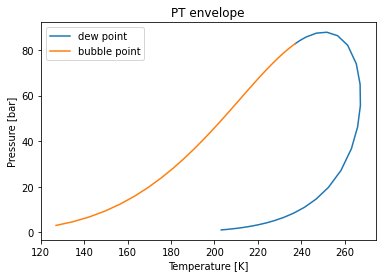

phase envelope for fluid 3


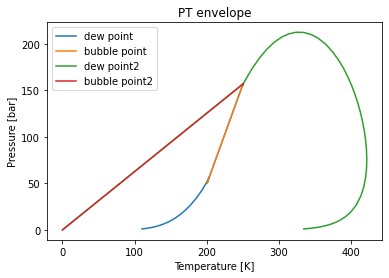

phase envelope for fluid 4


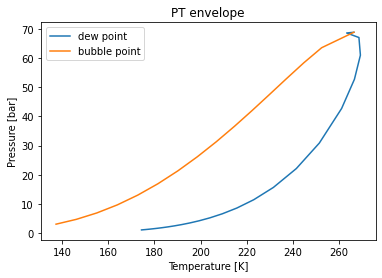

phase envelope for fluid 5


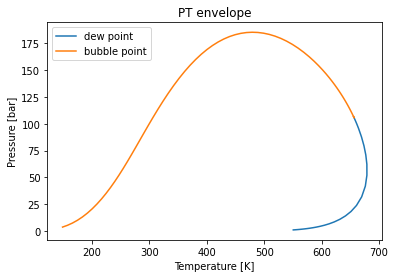

results of TPflash for fluid 5
                           total          gas          oil                     
            methane   3.42466E-1   5.37228E-1   3.30232E-2      [mole fraction]
             ethane   3.42466E-1   4.62769E-1   1.51325E-1      [mole fraction]
         C10-C15_PC   1.36986E-1   2.86476E-6   3.54629E-1      [mole fraction]
         C16-C19_PC   6.84932E-2   4.16564E-8   1.77317E-1      [mole fraction]
         C20-C30_PC   6.84932E-2   1.09279E-9   1.77317E-1      [mole fraction]
         C31-C50_PC   3.42466E-2  8.92672E-12   8.86583E-2      [mole fraction]
         C51-C80_PC   6.84932E-3  1.45893E-13   1.77317E-2      [mole fraction]
                                                                               
            Density                 9.57339E0    7.50645E2             [kg/m^3]
      PhaseFraction                6.13724E-1   3.86276E-1      [mole fraction]
          MolarMass    9.59291E1    2.25348E1     2.1254E2            [kg/kmol]
         

NameError: ignored

In [11]:
from neqsim.thermo import fluid, fluid_df, addOilFractions, printFrame, dataFrame, fluidcreator,createfluid,createfluid2, TPflash, phaseenvelope

# Start by creating a fluid in neqsim uing a predifined fluid (dry gas, rich gas, light oil, black oil)
#Set temperature and pressure and do a TPflash. Show results in a dataframe.
fluidcreator.setHasWater(False)
fluid1 = createfluid('dry gas')
fluid1.setPressure(10.0, "bara")
fluid1.setTemperature(22.3, "C")
TPflash(fluid1)
print('results of TPflash for fluid 1')
printFrame(fluid1)

#Calculate and display the phase envelope of various fluid types
fluid1 = createfluid('black oil')
print('phase envelope for black oil')
phaseenvelope(fluid1, True)

fluid2 = createfluid('dry gas')
print('phase envelope for fluid 2')
phaseenvelope(fluid2, True)

fluid3 = createfluid('rich gas')
print('phase envelope for fluid 3')
phaseenvelope(fluid3, True)

#Demonstration of a simple way of generating a fluid when component names and comosition are given as list
names = ['methane', 'ethane']
molefractions = [0.5, 0.5]
fluid4 = createfluid2(names, molefractions, "mol/sec")
print('phase envelope for fluid 4')
phaseenvelope(fluid4, True)

#Demonstration of simple way to adde characterized oil fractions to a fluid (a new fluid will be created)
charNames = ["C10-C15", "C16-C19", "C20-C30", "C31-C50", "C51-C80"]
charFlowrate = [0.2, 0.1, 0.1, 0.05, 0.01]
molarMass = [0.20, 0.25, 0.3, 0.36, 0.4]
density = [700.0e-3, 750.0e-3, 810.0e-3, 880.0e-3, 920.0e-3]
fluid5 = addOilFractions(fluid4, charNames,charFlowrate,molarMass, density);
print('phase envelope for fluid 5')
phaseenvelope(fluid5, True)
fluid5.setPressure(10.0, "bara")
fluid5.setTemperature(22.3, "C")
TPflash(fluid5)
print('results of TPflash for fluid 5')
printFrame(fluid5)



#Demonstration of creating fluid from a dataframe
# Define a dictionary with PVT data
reservoirFluid = {'ComponentName':  ["methane", "ethane", "C6", "C7"], 
        'MolarComposition[-]':  [0.5, 0.1,0.1, 0.3], 
        'MolarMass[kg/mol]': [None,None, 0.091, 0.19],
        'RelativeDensity[-]': [None,None, 0.7, 0.86 ]
  }

reservoirFluiddf = pd.DataFrame(reservoirFluid) 
print(reservoirFluiddf.head(20).to_string()) 
fluid7 = fluid_df(reservoirFluiddf, True)
phaseenvelope(fluid7, True)
printFrame(fluid7)

gascondensate = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20"], 
        'MolarComposition[-]':  [0.53, 3.3, 72.98, 7.68, 4.1, 0.7, 1.42, 0.54, 0.67, 0.85, 1.33, 1.33, 0.78, 0.61, 0.42, 0.33, 0.42, 0.24, 0.3, 0.17, 0.21, 0.15, 0.15, 0.8], 
        'MolarMass[kg/mol]': [None,None, None,None,None,None,None,None,None,None,0.0913, 0.1041, 0.1188, 0.136, 0.150, 0.164, 0.179, 0.188, 0.204, 0.216, 0.236, 0.253, 0.27, 0.391],
        'RelativeDensity[-]': [None,None, None,None,None,None,None,None,None,None, 0.746, 0.768, 0.79, 0.787, 0.793, 0.804, 0.817, 0.83, 0.835, 0.843, 0.837, 0.84, 0.85, 0.877]
  } 

gascondensatedf = pd.DataFrame(gascondensate) 
print(gascondensatedf.head(30).to_string())
gascondensateFluid = fluid_df(gascondensatedf, lastIsPlusFraction=True)
phaseenvelope(gascondensateFluid, True)
printFrame(gascondensateFluid)


# Create a gas-condensate fluid
naturalgas = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane"], 
        'MolarComposition[-]':  [0.34, 0.84, 90.4, 5.199, 2.06, 0.36, 0.55, 0.14, 0.097, 0.014]
} 

naturalgasdf = pd.DataFrame(naturalgas) 
print("Natural Gas Fluid:\n")
print(naturalgasdf.head(30).to_string())
naturalgasFluid = fluid_df(naturalgasdf)
print("\nPhase envelope of Natural Gas Fluid:\n")
phaseenvelope(naturalgasFluid)


In [8]:
#@title Create a fluid based on Eclipse  format
#@markdown This section gives an example of creating a fluid reading a text file on the Eclipse fluid format
%%capture
!pip install neqsim
!pip install wget
!wget https://github.com/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/examplefile.txt

In [9]:
from neqsim.thermo.thermoTools import readEclipseFluid

fluid1 = readEclipseFluid('examplefile.txt')

fluid1.setPressure(100.0, 'bara')
fluid1.setTemperature(25.0, 'C')
TPflash(fluid1)

printFrame(fluid1)

NameError: ignored